## Gibbs effect

The Gibbs effect holds on discontinuous functions, giving as result small oscillations around the discontinuity.

For testing purposes, let us consider
$$f_1(x)= \left\{
\begin{array}{ll}
1 & \quad -5 \leq x< 0,\\
3 & \quad  0 \leq x \leq5.\\
\end{array}\right.$$ with $x \in \Omega=[a,b]$.

And, as in the previous notebook, we try to compare, equispaced, CL and fake-CL nodes.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.simplefilter("ignore")
from fakenodes import lebesgue, lagrange_interp, fakenodes_interp

First of all, we set $\Omega = [-5,5]$ and $N=13$ the number of samples.

In [2]:
# Choice of function to be interpolated
f = lambda x : 1*(x<0) + 3*(x>=0)

# Mapping
S = lambda x: -5*np.cos(np.pi*(x+5)/10)

In [3]:
N=33    # Number of nodes
x_train = np.linspace(-5,5,N);  # Equispaced samples
x_test  = np.linspace(-5,5,331); # Grid points
y_train = f(x_train)    # Function values at samples
y_true = f(x_test)  # Function values at grid points

Then we compute the CL nodes

In [4]:
# Chebyshev points and function values

def ChebyL(n):
    #compute the set of n Chebyshev-Lobatto points in [-1,1]
    return -np.cos(np.pi*np.arange(0.,n)/(n-1))

x_CL  = ChebyL(N)*5
y_CL = f(x_CL)

And the fake CL nodes. No need to compute the out values here, this is **not** resampling!.

In [5]:
# Mapping of samples and grid points with S function: 
fake_x_train = S(x_train)
fake_x_test = S(x_test)

Now we compute the interpolation in the three cases....(plus the Lebesgue functions)

In [6]:
# Interpolation 
y_poly = lagrange_interp(x_test,x_train,y_train)
y_fake = lagrange_interp(fake_x_test,fake_x_train,y_train)
y_Cheb = lagrange_interp(x_test, x_CL, y_CL)

# Relative errors
err1 = np.linalg.norm(y_true-y_poly,2)/np.linalg.norm(y_true,2)
err2 = np.linalg.norm(y_true-y_Cheb,2)/np.linalg.norm(y_true,2)
err3 = np.linalg.norm(y_true-y_fake,2)/np.linalg.norm(y_true,2)

# Lebesgue functions
lsum1 = lebesgue(x_train,x_test)
lsum2 = lebesgue(x_CL,x_test)
lsum3 = lebesgue(S(x_train),S(x_test))

...and we plot the results!

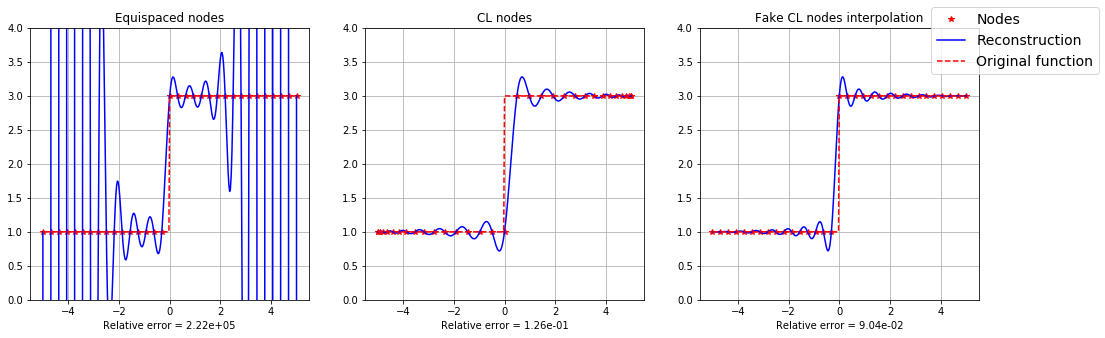

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(17,5))
ax1.cla(); ax2.cla(); ax3.cla()

ax1.plot(x_train, y_train,'r*', x_test, y_poly,'b-',x_test,y_true,'r--')
ax1.set_title("Equispaced nodes"); 
ax1.set_xlabel("Relative error = %.2e"%err1)

ax2.plot(x_CL, y_CL,'r*', x_test, y_Cheb,'b-',x_test,y_true,'r--')
ax2.set_title("CL nodes")
ax2.set_xlabel("Relative error = %.2e"%err2)

ax3.plot(x_train, y_train,'r*', x_test, y_fake,'b-',x_test,y_true,'r--')
ax3.set_title("Fake CL nodes interpolation")
ax3.set_xlabel("Relative error = %.2e"%err3)
ax3.legend(["Nodes","Reconstruction","Original function"],loc = (.83,.83), fontsize = 14)

ax1.set_ylim((-.1, 1.1)); ax2.set_ylim((-.1, 1.1)); ax3.set_ylim((-.1, 1.1));
ax1.set_ylim((0, 4)); ax2.set_ylim((0, 4)); ax3.set_ylim((0, 4));          
ax1.grid(True); ax2.grid(True); ax3.grid(True);
fig.show()
fig.savefig("gibbs_interp1.png")

It has to be noticed that the fake CL nodes, as the CL nodes, do not mitigate the Gibbs effect, but they only avois Runge-like oscillations. We have to operate a different choice for the mapping function.
In this case we choose the discontinuous shift

$$s(x)= \left\{
\begin{array}{ll}
0 & \quad  -5 \leq x< 0,\\
100 & \quad  0 \leq x \leq5.\\
\end{array}\right.$$

which is equivaletnt to use the map

$$S(x)= \left\{
\begin{array}{ll}
x & \quad  -5 \leq x< 0,\\
x+100 & \quad  0 \leq x \leq5.\\
\end{array}\right.$$


In [8]:
S2 = lambda x: x + 100*(x>=0) # Discontinuous map
y_fake2 = lagrange_interp(S2(x_test), S2(x_train), y_train)
err4 = np.linalg.norm(y_true-y_fake2,2)/np.linalg.norm(y_true,2)
lsum4 = lebesgue(S2(x_train),S2(x_test))

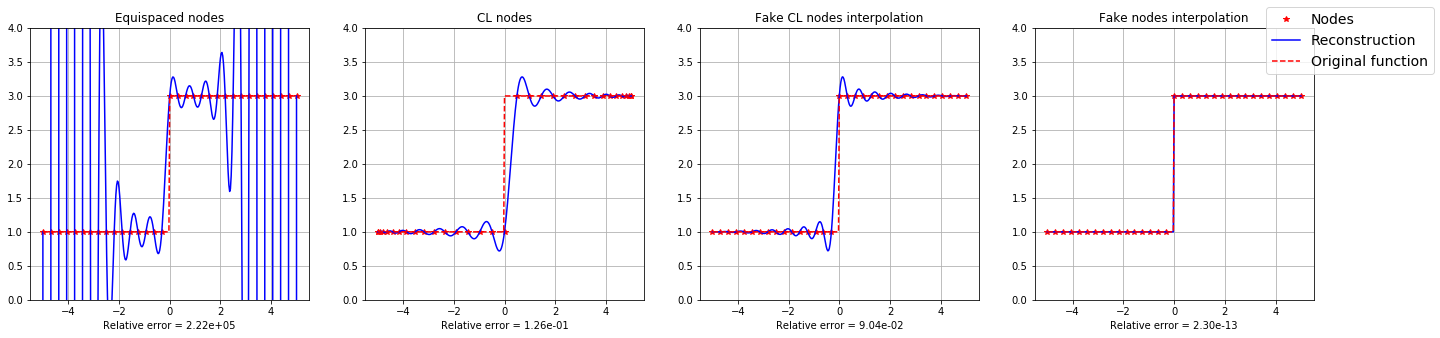

In [9]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4,figsize=(23,5))
ax1.cla(); ax2.cla(); ax3.cla(); ax4.cla()

ax1.plot(x_train, y_train,'r*', x_test, y_poly,'b-',x_test,y_true,'r--')
ax1.set_title("Equispaced nodes"); 
ax1.set_xlabel("Relative error = %.2e"%err1)

ax2.plot(x_CL, y_CL,'r*', x_test, y_Cheb,'b-',x_test,y_true,'r--')
ax2.set_title("CL nodes")
ax2.set_xlabel("Relative error = %.2e"%err2)

ax3.plot(x_train, y_train,'r*', x_test, y_fake,'b-',x_test,y_true,'r--')
ax3.set_title("Fake CL nodes interpolation")
ax3.set_xlabel("Relative error = %.2e"%err3)

ax4.plot(x_train, y_train,'r*', x_test, y_fake2,'b-',x_test,y_true,'r--')
ax4.set_title("Fake nodes interpolation")
ax4.set_xlabel("Relative error = %.2e"%err4)

ax4.legend(["Nodes","Reconstruction","Original function"],loc = (.83,.83), fontsize = 14)

ax1.set_ylim((-.1, 1.1)); ax2.set_ylim((-.1, 1.1)); ax3.set_ylim((-.1, 1.1)); ax4.set_ylim((-.1, 1.1))
ax1.set_ylim((0, 4)); ax2.set_ylim((0, 4)); ax3.set_ylim((0, 4)); ax4.set_ylim((0, 4))         
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True);
fig.show()
fig.savefig("gibbs_interp2.png")

As we can see, this choice of map function leads to a much better fit than the other methods. We now evaluate the Lebesgue functions. 

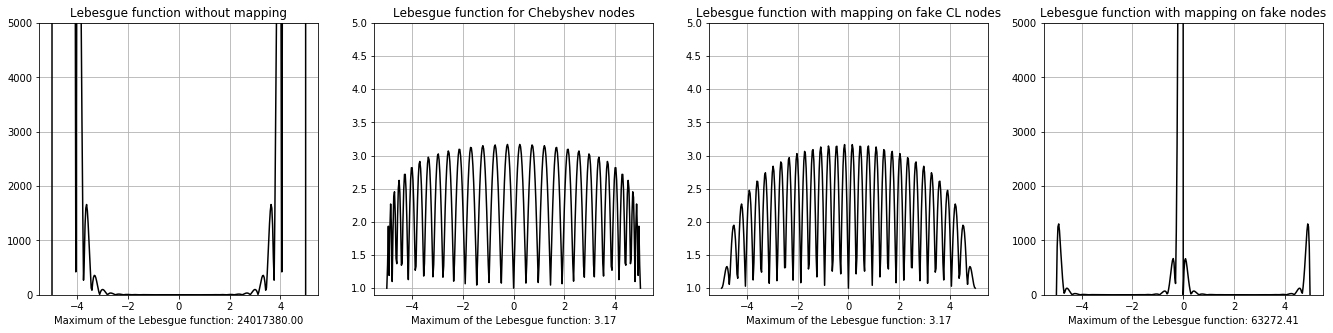

In [10]:
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(23,5))
ax1.plot(x_test,lsum1,'k-')
ax1.set_title('Lebesgue function without mapping')
ax1.grid(True)
ax1.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum1))

ax2.plot(x_test,lsum2,'k-')
ax2.set_title('Lebesgue function for Chebyshev nodes')
ax2.grid(True)
ax2.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum2))

ax3.plot(x_test,lsum3,'k-')
ax3.set_title('Lebesgue function with mapping on fake CL nodes')
ax3.grid(True)
ax3.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum3))

ax4.plot(x_test,lsum4,'k-')
ax4.set_title('Lebesgue function with mapping on fake nodes')
ax4.grid(True)
ax4.set_xlabel("Maximum of the Lebesgue function: %.2f"%np.max(lsum4))

ax1.set_ylim((.9, 5000)); ax2.set_ylim((.9, 5)); ax3.set_ylim((.9, 5)); ax4.set_ylim((.9, 5000))

fig2.savefig("gibbs_lebesgue.png")

The last plot from left shows that fake nodes has higher values than CL/fake-CL nodes, with a great peack around the discontinuity.